In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: March 2025
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Uniform Distribution

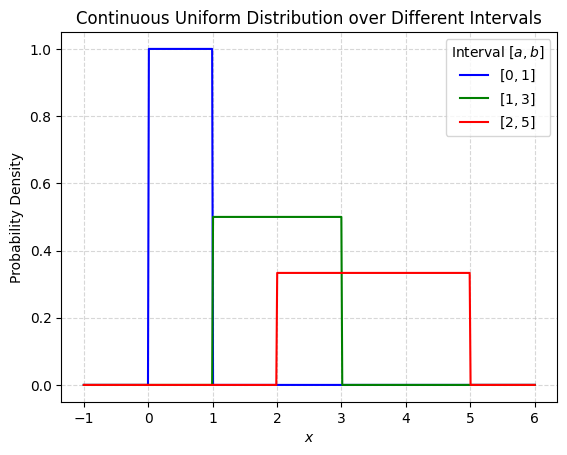

In [3]:
from scipy.stats import uniform

# Define x-axis range for support [a, b]
x = np.linspace(-1, 6, 500)

# Define a few (a, b) intervals
intervals = [(0, 1), (1, 3), (2, 5)]
colors = ['blue', 'green', 'red']

# Plot uniform PDFs for different intervals
for (a, b), color in zip(intervals, colors):
    scale = b - a
    plt.plot(x, uniform.pdf(x, loc=a, scale=scale), label=rf'$[{a}, {b}]$', color=color)

plt.title('Continuous Uniform Distribution over Different Intervals')
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Interval $[a, b]$')
plt.savefig('figures/continuous_uniform_distribution.pdf')

Normal Distribution

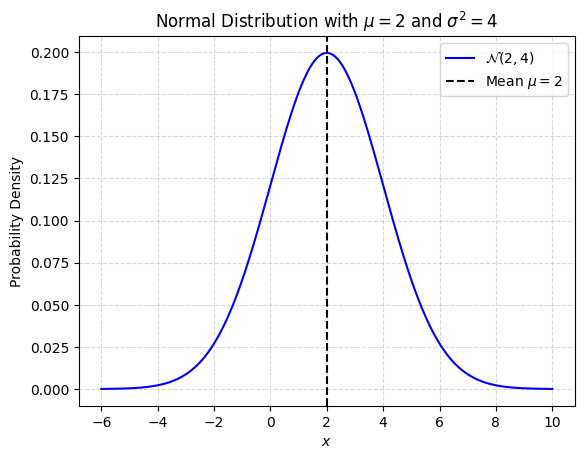

In [4]:
from scipy.stats import norm

mu = 2
sigma = 2  
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y, label=rf'$\mathcal{{N}}({mu}, {sigma**2})$', color='blue')
plt.title('Normal Distribution with $\mu = 2$ and $\sigma^2 = 4$')
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.axvline(mu, color='black', linestyle='--', label=rf'Mean $\mu = {mu}$')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.savefig('figures/normal_distribution.pdf')

Standard Normal Distribution

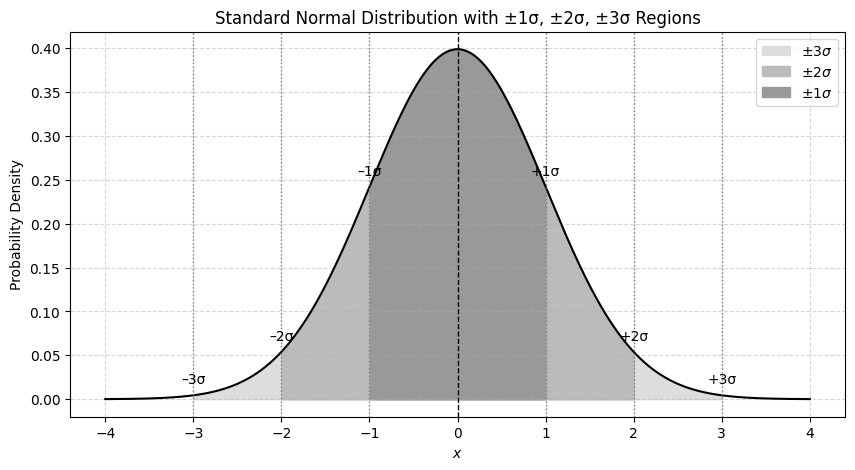

In [5]:
from scipy.stats import norm

# Parameters for standard normal
mu, sigma = 0, 1

# Range of x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Grayscale shades (from lightest for ±3σ to darkest for ±1σ)
grayscale_shades = ['#dddddd', '#bbbbbb', '#999999']

# Intervals and labels
intervals = [(mu - 3*sigma, mu + 3*sigma),
             (mu - 2*sigma, mu + 2*sigma),
             (mu - sigma, mu + sigma)]

labels = [r'$\pm 3\sigma$', r'$\pm 2\sigma$', r'$\pm 1\sigma$']

# Plot standard normal distribution
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='black')

# Shade intervals
for (a, b), color, label in zip(intervals, grayscale_shades, labels):
    plt.fill_between(x, y, where=(x >= a) & (x <= b), color=color, alpha=1, label=label)

# Central mean line
plt.axvline(mu, color='black', linestyle='--', linewidth=1)

# Add vertical lines and labels for transitions
for std in [1, 2, 3]:
    plt.axvline(mu - std*sigma, color='gray', linestyle=':', linewidth=1)
    plt.axvline(mu + std*sigma, color='gray', linestyle=':', linewidth=1)
    plt.text(mu + std*sigma, norm.pdf(mu + std*sigma)+0.01,
             f'+{std}σ', ha='center', va='bottom', fontsize=10)
    plt.text(mu - std*sigma, norm.pdf(mu - std*sigma)+0.01,
             f'–{std}σ', ha='center', va='bottom', fontsize=10)

plt.title('Standard Normal Distribution with ±1σ, ±2σ, ±3σ Regions')
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.savefig('figures/standard_normal_pdf.pdf')

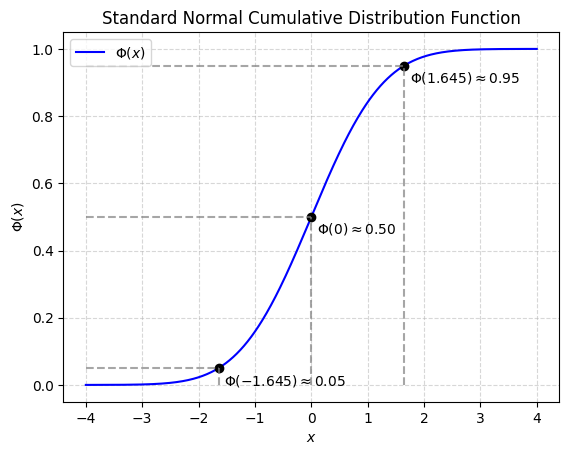

In [6]:
# Define the standard normal CDF
x = np.linspace(-4, 4, 500)
cdf = norm.cdf(x)

# Plot the CDF of the standard normal distribution
plt.plot(x, cdf, label=r'$\Phi(x)$', color='blue')

# Highlight key points
key_points = [(-1.645, norm.cdf(-1.645)), (0, 0.5), (1.645, norm.cdf(1.645))]
for xp, yp in key_points:
    plt.plot(xp, yp, 'ko')
    plt.vlines(xp, 0, yp, linestyle='--', color='gray', alpha=0.7)
    plt.hlines(yp, -4, xp, linestyle='--', color='gray', alpha=0.7)
    plt.text(xp + 0.1, yp - 0.05, rf'$\Phi({xp}) \approx {yp:.2f}$', fontsize=10)

plt.title('Standard Normal Cumulative Distribution Function')
plt.xlabel('$x$')
plt.ylabel(r'$\Phi(x)$')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.savefig('figures/standard_normal_cdf.pdf')

$t$-Distribution

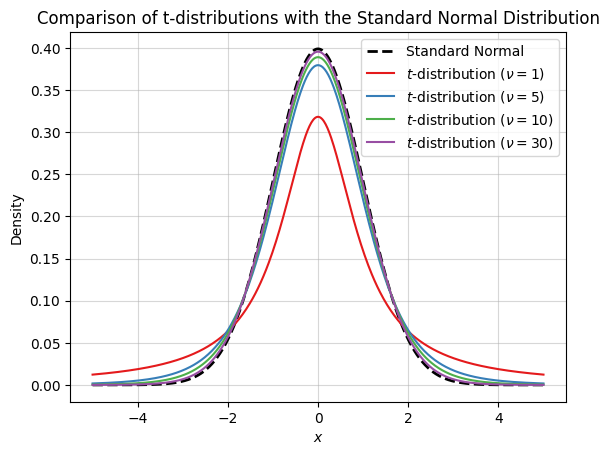

In [7]:
from scipy.stats import t, norm

# x-axis range
x = np.linspace(-5, 5, 500)

# Normal PDF
normal_pdf = norm.pdf(x)

# t-distributions with different degrees of freedom
dfs = [1, 5, 10, 30]
colors = plt.get_cmap('Set1')

# Plot
plt.plot(x, normal_pdf, 'k--', label='Standard Normal', linewidth=2)
for i, df in enumerate(dfs):
    plt.plot(x, t.pdf(x, df), label=fr"$t$-distribution ($\nu={df}$)", color=colors(i))

plt.title("Comparison of t-distributions with the Standard Normal Distribution")
plt.xlabel("$x$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('figures/t-distribution.pdf')

Log-Normal Distribution

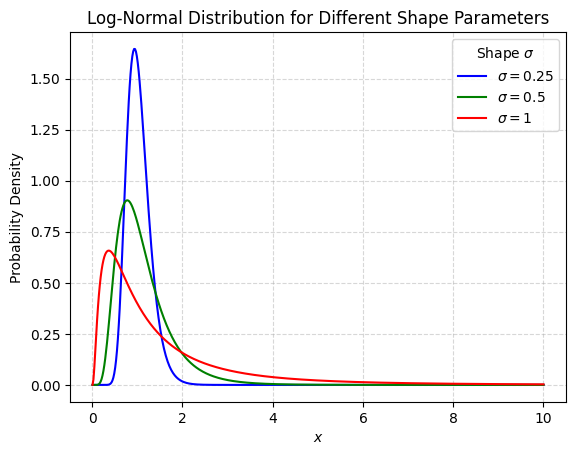

In [8]:
from scipy.stats import lognorm

# Define x-axis range
x = np.linspace(0.01, 10, 500)

# Log-normal shape parameters (standard deviation of log(X))
sigmas = [0.25, 0.5, 1]
colors = ['blue', 'green', 'red']

# Plot log-normal PDFs with location=0, scale=1
for sigma, color in zip(sigmas, colors):
    plt.plot(x, lognorm.pdf(x, s=sigma, scale=1), label=rf'$\sigma = {sigma}$', color=color)

plt.title('Log-Normal Distribution for Different Shape Parameters')
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Shape $\sigma$')
plt.savefig('figures/log_normal_distribution.pdf')

Exponential Distribution

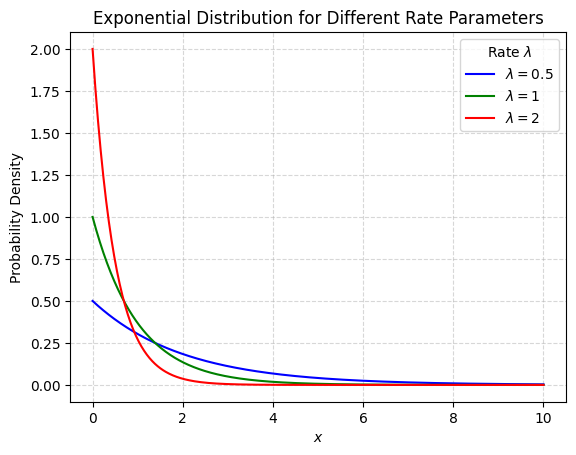

In [9]:
from scipy.stats import expon

# Define x-axis range
x = np.linspace(0, 10, 500)

# Rate parameters (lambda) and corresponding scale = 1 / lambda
rates = [0.5, 1, 2]
scales = [1/r for r in rates]
colors = ['blue', 'green', 'red']

# Plot exponential PDFs
for rate, scale, color in zip(rates, scales, colors):
    plt.plot(x, expon.pdf(x, scale=scale), label=rf'$\lambda = {rate}$', color=color)

plt.title('Exponential Distribution for Different Rate Parameters')
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Rate $\lambda$')
plt.savefig('figures/exponential_distribution.pdf')

Gamma Distribution

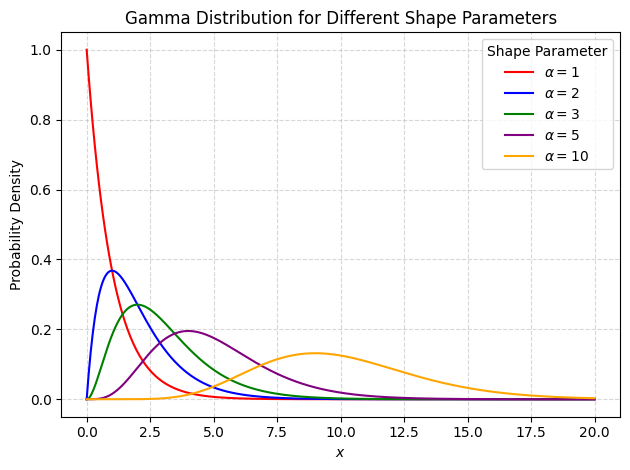

In [10]:
from scipy.stats import gamma

# Define x-axis range
x = np.linspace(0, 20, 500)

# Define several alpha (shape) values
alphas = [1, 2, 3, 5, 10]
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Plot Gamma PDFs for different shape parameters
for a, color in zip(alphas, colors):
    plt.plot(x, gamma.pdf(x, a, scale=1), label=rf'$\alpha = {a}$', color=color)

plt.title('Gamma Distribution for Different Shape Parameters')
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.legend(title='Shape Parameter')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('figures/gamma_distribution.pdf')

Chi-Squared Distribution

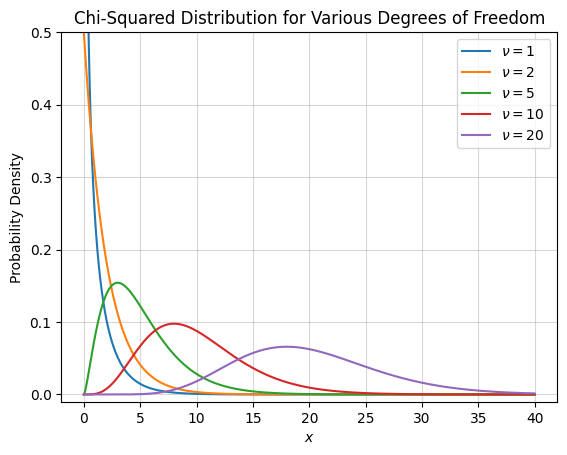

In [11]:
from scipy.stats import chi2

# Degrees of freedom to plot
dfs = [1, 2, 5, 10, 20]
x = np.linspace(0, 40, 1000)

for df in dfs:
    plt.plot(x, chi2.pdf(x, df), label=f"$\\nu = {df}$")

plt.title("Chi-Squared Distribution for Various Degrees of Freedom")
plt.ylim([-0.01, 0.5])
plt.xlabel("$x$")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('figures/chi_squared_distribution.pdf')

Beta Distribution

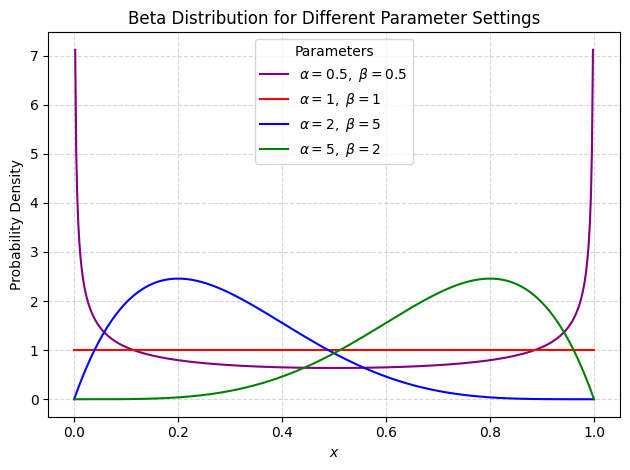

In [12]:
from scipy.stats import beta

# Define x-axis range
x = np.linspace(0, 1, 500)

# Beta distribution parameter pairs
params = [(0.5, 0.5), (1, 1), (2, 5), (5, 2)]
labels = [r'$\alpha=0.5,\ \beta=0.5$',
          r'$\alpha=1,\ \beta=1$',
          r'$\alpha=2,\ \beta=5$',
          r'$\alpha=5,\ \beta=2$']
colors = ['purple', 'red', 'blue', 'green']

# Plot the Beta PDFs
for (a, b), label, color in zip(params, labels, colors):
    plt.plot(x, beta.pdf(x, a, b), label=label, color=color)

plt.title('Beta Distribution for Different Parameter Settings')
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.legend(title='Parameters')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('figures/beta_distribution.pdf')